# Embeddings and Vector Databases

- What are Vector representations of Text
- How embeddings work? Word2Vec, BERT
- [Hands-On] Generate embeddings for sentences using Hugging Face
- Vector Database Ecosystem overview - ChromaDB, Pinecone, Postgres Vector
- [Hands-On] Vector database with Tesla 10-K statements 

In [ ]:
Embeddings - numerical representation of data in a high dimensional vector space

"data" = "data" (keyword based search)


Vector Databases
it will store, index, and query these high dimensional vector space

similarity search using techniques like - cosine similarity, euclidean distance

## What are Vector representations of Text

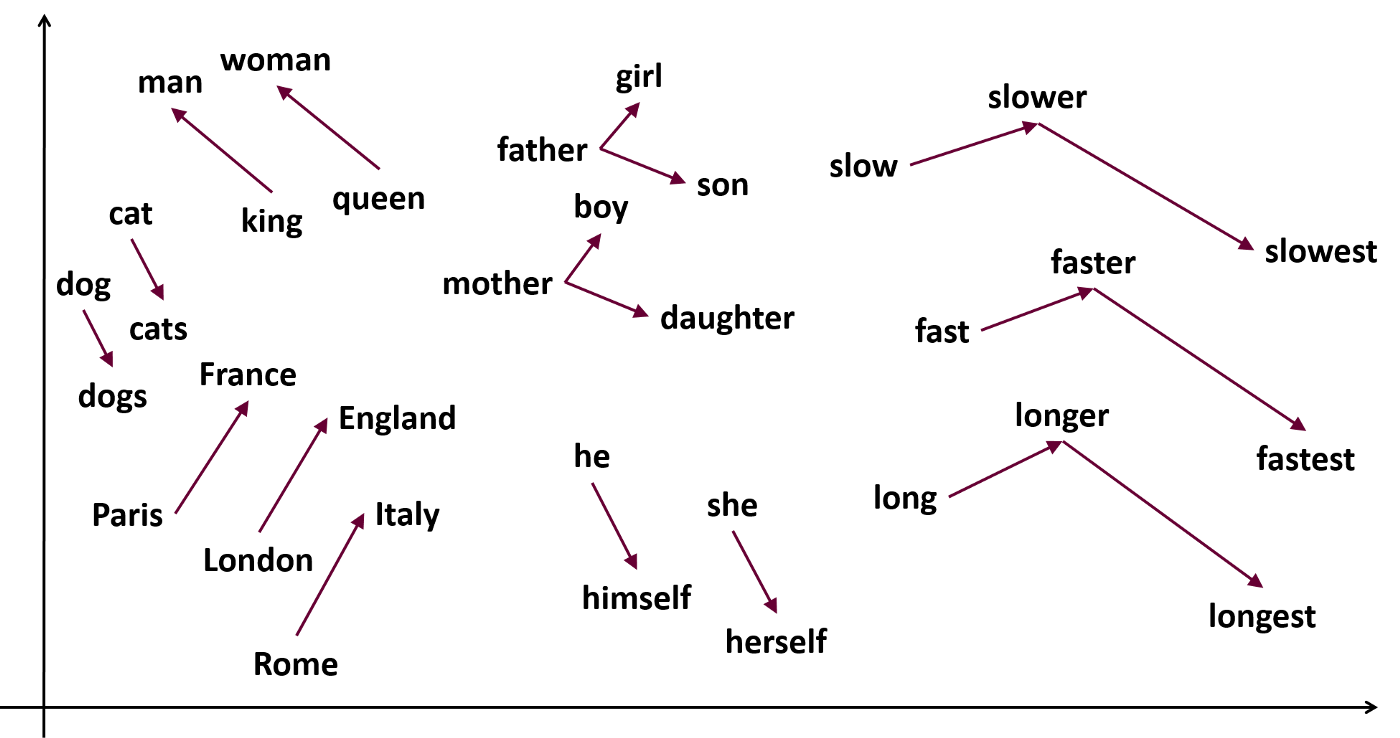

## How embeddings work? Word2Vec, BERT

Word2Vec: https://nlp.stanford.edu/projects/glove/


https://github.com/hemansnation/Neurons-To-GenerativeAI/blob/main/V1/Module%2003%20-%20Natural%20Language%20Processing/07_Natural%20Language%20Processing.ipynb

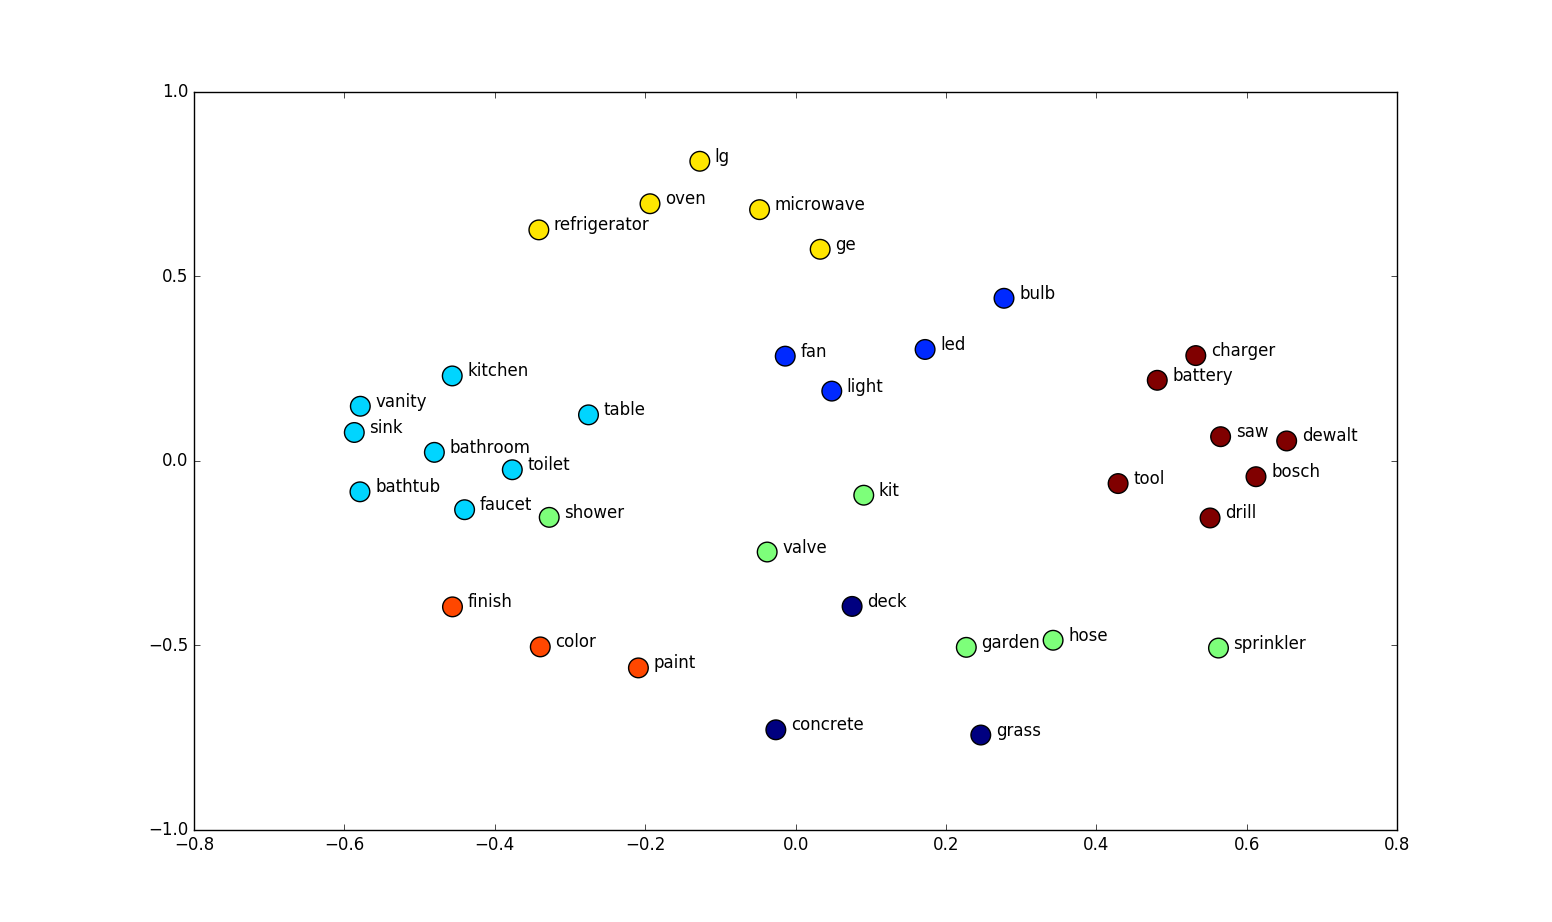

In [ ]:
Word2Vec

its a neural network model that generates word embeddings based on word occurrence


apple

In [ ]:
BERT


bank in river bank

vs

bank account

## [Hands-On] Generate embeddings for sentences using Hugging Face


In [1]:
!pip install scikit-learn

In [2]:
!pip install sentence-transformers

In [3]:
from sentence_transformers import SentenceTransformer

import numpy as np

from sklearn.metrics.pairwise import cosine_similarity

In [4]:
model = SentenceTransformer('all-MiniLM-L6-v2')

sentences = [
    "renewable energy is critical for sustainability",
    "solar and wind power reduce carbon emissions",
    "fossil fules contribute to global warming"
]

In [6]:
embeddings = model.encode(sentences)

print(f"Embedding shape: {embeddings.shape}")
print(f"Embedding for first sentence: {embeddings[0][0:5]}")

Embedding shape: (3, 384)
Embedding for first sentence: [-0.02577453  0.1367515  -0.01193964 -0.00550899  0.07085476]


In [7]:
similarity_matrix = cosine_similarity(embeddings)

print("Cosine Similarity Matrix: ")
print(similarity_matrix)

Cosine Similarity Matrix: 
[[0.99999994 0.51875794 0.29070646]
 [0.51875794 0.9999998  0.3673199 ]
 [0.29070646 0.3673199  1.        ]]


In [ ]:
## just the intepretation

In [8]:
for i in range(len(sentences)):
    for j in range(i+1, len(sentences)):
        print(f"Similarity between '{sentences[i]}' and '{sentences[j]}' : {similarity_matrix[i][j]: .4f} ")

Similarity between 'renewable energy is critical for sustainability' and 'solar and wind power reduce carbon emissions' :  0.5188 
Similarity between 'renewable energy is critical for sustainability' and 'fossil fules contribute to global warming' :  0.2907 
Similarity between 'solar and wind power reduce carbon emissions' and 'fossil fules contribute to global warming' :  0.3673 


## Vector Database Ecosystem overview - ChromaDB, Pinecone, Postgres Vector


In [ ]:
ChromaDB

- open-source
- low-medium (small projects, prototype)
- free

In [ ]:
Pinecone

- cloud based
- high (large-scale AI apps) 
- paid

In [ ]:
Postgres Vector

- open-source
- medium (hybrid SQL vector workflows)
- free/low

## [Hands-On] Vector database with Tesla 10-K statements

In [9]:
!pip install chromadb

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  Using cached build-1.2.2.post1-py3-none-any.whl.metadata (6.5 kB)
  Using cached opentelemetry_api-1.34.1-py3-none-any.whl.metadata (1.5 kB)
  Using cached opentelemetry_exporter_otlp_proto_grpc-1.34.1-py3-none-any.whl.metadata (2.4 kB)
  Using cached opentelemetry_sdk-1.34.1-py3-none-any.whl.metadata (1.6 kB)
  Using cached PyPika-0.48.9-py2.py3-none-any.whl
  Using cached importlib_resources-6.5.2-py3-none-any.whl.metadata (3.9 kB)
  Using cached bcrypt-4.3.0-cp39-abi3-macosx_10_12_universal2.whl.metadata (10 kB)
  Using cached typer-0.16.0-py3-none-any.whl.metadata (15 kB)
  Using cached mmh3-5.1.0-cp312-cp312-macosx_11_0_arm64.whl.metadata (16 kB)
  Using cached pyproject_hooks-1.2.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached requests_oauthlib-2.0.0-py2.py3-none-any.whl.metadata (11 kB)
  Using cached coloredlogs-15.0.1-py2.py3-none-any.whl.metadata (12 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached protobuf-6.31.1-cp39-abi3

In [10]:
from sentence_transformers import SentenceTransformer
from langchain.text_splitter import RecursiveCharacterTextSplitter

from langchain.vectorstores import Chroma
from langchain.embeddings import HuggingFaceEmbeddings

import chromadb

In [11]:
sample_text = """
We design, develop, manufacture, sell and lease high-performance fully electric vehicles and energy generation and storage systems, and offer services related to our products. We generally sell our products directly to customers, including through our website and retail locations. We also continue to grow our customer-facing infrastructure through a global network of vehicle service centers, Mobile Service technicians, body shops, Supercharger stations and Destination Chargers to accelerate the widespread adoption of our products.
"""

In [13]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=200, chunk_overlap=20)

chunks = text_splitter.split_text(sample_text)

In [14]:
embedding_model = HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")

/var/folders/z3/_r6sc2t11pn4yxr_v048r5sr0000gn/T/ipykernel_63561/2537902316.py:1: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embedding_model = HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")


In [15]:
chroma_client = chromadb.Client()

collection = Chroma.from_texts(
    texts = chunks,
    embedding = embedding_model,
    collection_name="tesla_10k"
)

In [16]:
query = "What are Tesla's production capabilities?"
results = collection.similarity_search(query, k=2)

print("Query: ", query)
print("Top 2 relevant chunks: ")

for i, result in enumerate(results):
    print(f"Result {i+1}: {result.page_content}")

Query:  What are Tesla's production capabilities?
Top 2 relevant chunks: 
Result 1: We design, develop, manufacture, sell and lease high-performance fully electric vehicles and energy generation and storage systems, and offer services related to our products. We generally sell our
Result 2: network of vehicle service centers, Mobile Service technicians, body shops, Supercharger stations and Destination Chargers to accelerate the widespread adoption of our products.
